In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
#한글폰트 설치
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/MALGUN.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
df = pd.read_csv('c:/프로젝트/Data/finaldata.csv')
df.head(3) 

,Unnamed: 0,전용면적,거래금액,층,건축년도,계약년월일,면적당가격,구,동,계약년,...,유로,소비자물가지수,소비자물가지수(전월 대비 증감률),KOSPI_종가,KOSDAQ_종가,무담보콜금리(1일),KORIBOR(3개월),CD(91일),국고채(1년),국고채(10년)
0,0,59.97,21100,8,2006,2007-01-01,351.842588,강동구,길동,2007,...,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
1,1,59.34,22000,8,1996,2007-01-01,370.744860,노원구,중계동,2007,...,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
2,2,84.99,31500,10,2000,2007-01-01,370.631839,성북구,정릉동,2007,...,1220.07,76.496,0.2,1360.23,576.37,4.63,4.91,4.92,4.98,5.04


In [4]:
# 불필요한 열 삭제
df.drop(df.iloc[:,[0]], axis=1, inplace=True)

In [5]:
df.info

<bound method DataFrame.info of             전용면적    거래금액   층  건축년도       계약년월일        면적당가격    구     동   계약년  \
0         59.970   21100   8  2006  2007-01-01   351.842588  강동구    길동  2007   
1         59.340   22000   8  1996  2007-01-01   370.744860  노원구   중계동  2007   
2         84.990   31500  10  2000  2007-01-01   370.631839  성북구   정릉동  2007   
3         59.940   15800   9  1995  2007-01-01   263.596930  노원구   월계동  2007   
4         84.570   28000   7  2003  2007-01-01   331.086674  강동구    길동  2007   
...          ...     ...  ..   ...         ...          ...  ...   ...   ...   
1117745   84.770  119000   4  1997  2023-01-31  1403.798514  양천구    목동  2023   
1117746   59.855   57000  13  2003  2023-01-31   952.301395  성북구  하월곡동  2023   
1117747   59.785  104500   7  2019  2023-01-31  1747.930083  강동구   고덕동  2023   
1117748   14.910   12000  20  2014  2023-01-31   804.828974  구로구   구로동  2023   
1117749  120.420  252000   1  1988  2023-01-31  2092.675635  송파구   방이동  2023   

       

In [45]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
전용면적,1117750.0,77.112594,29.472390,10.020000,59.640000,81.880000,84.96000,4.243200e+02
거래금액,1117750.0,57200.008604,45482.846000,350.000000,30300.000000,44300.000000,68700.00000,1.450000e+06
층,1117750.0,8.850280,5.971075,-4.000000,4.000000,8.000000,12.00000,6.900000e+01
건축년도,1117750.0,1998.731361,9.316677,1961.000000,1992.000000,2000.000000,2005.00000,2.023000e+03
면적당가격,1117750.0,734.733934,437.906249,5.109288,451.203209,598.932266,879.56618,8.811622e+03
계약년,1117750.0,2014.593950,4.081002,2007.000000,2011.000000,2015.000000,2018.00000,2.023000e+03
계약월,1117750.0,6.370143,3.320731,1.000000,4.000000,6.000000,9.00000,1.200000e+01
계약일,1117750.0,15.808837,8.727186,1.000000,8.000000,16.000000,23.00000,3.100000e+01
년월,1117750.0,201465.765177,408.208801,200701.000000,201110.000000,201507.000000,201802.00000,2.023010e+05
주택담보대출금리,1117750.0,3.852002,1.281855,2.390000,2.920000,3.360000,4.80000,7.580000e+00


In [6]:
df.columns

Index(['전용면적', '거래금액', '층', '건축년도', '계약년월일', '면적당가격', '구', '동', '계약년', '계약월',
       '계약일', '년월', '일자', '주택담보대출(연%)', '미국달러', '일본엔', '유로', '소비자물가지수',
       '소비자물가지수(전월 대비 증감률)', '  KOSPI_종가', '  KOSDAQ_종가', '  무담보콜금리(1일)',
       'KORIBOR(3개월)', 'CD(91일)', '국고채(1년)', '국고채(10년)'],
      dtype='object')

In [7]:
# 컬럼 공백 제거
df.columns=df.columns.str.lstrip()
df.columns

Index(['전용면적', '거래금액', '층', '건축년도', '계약년월일', '면적당가격', '구', '동', '계약년', '계약월',
       '계약일', '년월', '일자', '주택담보대출(연%)', '미국달러', '일본엔', '유로', '소비자물가지수',
       '소비자물가지수(전월 대비 증감률)', 'KOSPI_종가', 'KOSDAQ_종가', '무담보콜금리(1일)',
       'KORIBOR(3개월)', 'CD(91일)', '국고채(1년)', '국고채(10년)'],
      dtype='object')

In [8]:
# 컬럼명 변경
df.rename(columns= {
    '주택담보대출(연%)':'주택담보대출금리', '무담보콜금리(1일)':'콜금리_1일', 
    'KORIBOR(3개월)':'KORIBOR_3개월','CD(91일)' : 'CD_91일', '국고채(1년)':'국고채_1년', 
    '국고채(10년)':'국고채_10년'
    }, inplace=True) 

In [9]:
#변수 16개 데이터 생성
df1=df[['면적당가격','전용면적','층', '건축년도','미국달러', '일본엔','유로','소비자물가지수',
        '주택담보대출금리', 'KOSPI_종가', 'KOSDAQ_종가','콜금리_1일','KORIBOR_3개월','CD_91일',
        '국고채_1년','국고채_10년']]
df1.head(3)

,면적당가격,전용면적,층,건축년도,미국달러,일본엔,유로,소비자물가지수,주택담보대출금리,KOSPI_종가,KOSDAQ_종가,콜금리_1일,KORIBOR_3개월,CD_91일,국고채_1년,국고채_10년
0,351.842588,59.97,8,2006,940.9,7.731,1220.07,76.496,6.11,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
1,370.744860,59.34,8,1996,940.9,7.731,1220.07,76.496,6.11,1360.23,576.37,4.63,4.91,4.92,4.98,5.04
2,370.631839,84.99,10,2000,940.9,7.731,1220.07,76.496,6.11,1360.23,576.37,4.63,4.91,4.92,4.98,5.04


In [10]:
# 상관관계
df1.corr()

,면적당가격,전용면적,층,건축년도,미국달러,일본엔,유로,소비자물가지수,주택담보대출금리,KOSPI_종가,KOSDAQ_종가,콜금리_1일,KORIBOR_3개월,CD_91일,국고채_1년,국고채_10년
면적당가격,1.000000,0.042055,0.108048,0.041924,0.201177,-0.013569,-0.117942,0.394555,-0.303471,0.382759,0.350334,-0.357040,-0.345466,-0.348573,-0.349898,-0.312418
전용면적,0.042055,1.000000,0.104628,0.073384,0.035210,0.025950,-0.004060,0.037240,-0.047998,0.007617,-0.014844,-0.053861,-0.054264,-0.054424,-0.053894,-0.042993
층,0.108048,0.104628,1.000000,0.187528,0.018425,-0.002713,-0.020597,0.046195,-0.041686,0.033875,0.020553,-0.039316,-0.040830,-0.040923,-0.041675,-0.041006
건축년도,0.041924,0.073384,0.187528,1.000000,0.029419,-0.045598,-0.089408,0.154000,-0.122363,0.135024,0.109043,-0.107188,-0.111637,-0.111984,-0.115472,-0.125770
미국달러,0.201177,0.035210,0.018425,0.029419,1.000000,0.575870,0.359590,0.322814,-0.301409,-0.123351,-0.183999,-0.563199,-0.499134,-0.497881,-0.494042,-0.250828
일본엔,-0.013569,0.025950,-0.002713,-0.045598,0.575870,1.000000,0.706629,-0.126747,0.173326,-0.301375,-0.553465,-0.066094,-0.003157,-0.005788,0.011217,0.217668
유로,-0.117942,-0.004060,-0.020597,-0.089408,0.359590,0.706629,1.000000,-0.535309,0.615641,-0.511901,-0.557270,0.319305,0.403360,0.398445,0.437919,0.686979
소비자물가지수,0.394555,0.037240,0.046195,0.154000,0.322814,-0.126747,-0.535309,1.000000,-0.898740,0.732017,0.490816,-0.815661,-0.850602,-0.850566,-0.872546,-0.887242
주택담보대출금리,-0.303471,-0.047998,-0.041686,-0.122363,-0.301409,0.173326,0.615641,-0.898740,1.000000,-0.574863,-0.401317,0.868822,0.921548,0.917203,0.947333,0.961655
KOSPI_종가,0.382759,0.007617,0.033875,0.135024,-0.123351,-0.301375,-0.511901,0.732017,-0.574863,1.000000,0.784428,-0.531184,-0.561513,-0.568797,-0.557318,-0.577075


c:\Anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


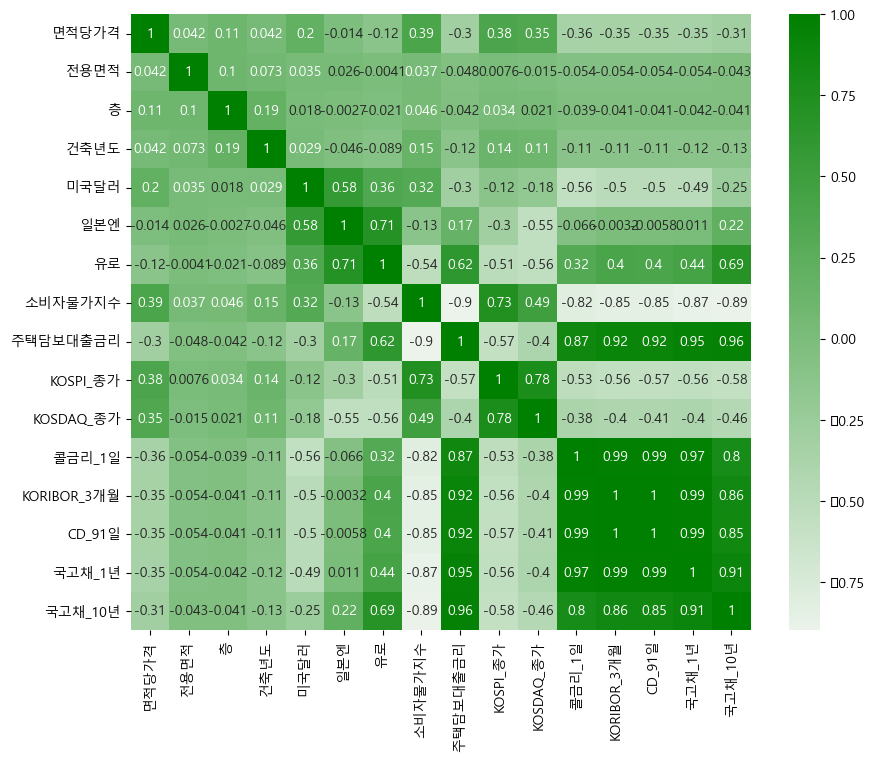

In [11]:
#상관관계 히트맵
plt.figure(figsize = (10,8))
cmap = sns.light_palette('green', as_cmap=True)
sns.heatmap(df1.corr(),annot=True, cmap=cmap)
plt.show()

In [12]:
# 16개 변수 다중회귀분석
X=df1[['전용면적','층','건축년도','주택담보대출금리','미국달러', '일본엔','유로', '소비자물가지수', 'KOSPI_종가' ,'KOSDAQ_종가', 
        '콜금리_1일','KORIBOR_3개월','CD_91일' , '국고채_1년','국고채_10년']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.8046125566455984
P-value:
 전용면적           6.215217e-238
층               0.000000e+00
건축년도            0.000000e+00
주택담보대출금리        2.796779e-43
미국달러            0.000000e+00
일본엔             4.990759e-11
유로              0.000000e+00
소비자물가지수         0.000000e+00
KOSPI_종가        0.000000e+00
KOSDAQ_종가       0.000000e+00
콜금리_1일          0.000000e+00
KORIBOR_3개월     0.000000e+00
CD_91일          1.611320e-03
국고채_1년          1.567005e-89
국고채_10년        4.617136e-201
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.805
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                          3.069e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:03:29   Log-Likelihood:                     -8.2200e+06
No. Observations:             1117750   AIC:                                  1.644e+07
Df Residuals:                 1117735   BIC:                                  1.644e+07
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
전용면적            0.4033      0.012     32.946      0.000       0.379       0.427
층               6.7808      0.060    112.359      0.000       6.662       6.899
건축년도           -1.4195      0.009   -166.244      0.000      -1.436      -1.403
주택담보대출금리      -27.5872      2.000    -13.794      0.000     -31.507     -23.667
미국달러            0.4614      0.011     43.840      0.000       0.441       0.482
일본엔             2.9670      0.452      6.571      0.000       2.082       3.852
유로              0.5161      0.007     77.267      0.000       0.503       0.529
소비자물가지수        15.5587      0.208     74.624      0.000      15.150      15.967
KOSPI_종가        0.1293      0.003     39.609      0.000       0.123       0.136
KOSDAQ_종가       0.8943      0.006    139.498      0.000       0.882       0.907
콜금리_1일       -373.1956      3.855    -96.800      0.000    -380.752    -365.639
KORIBOR_3개월   521.9992     10.126     51.552      0.000     502.153     541.845
CD_91일        -31.4078      9.959     -3.154      0.002     -50.926     -11.889
국고채_1년        -76.2908      3.802    -20.064      0.000     -83.743     -68.838
국고채_10년       -51.1887      1.692    -30.260      0.000     -54.504     -47.873
==============================================================================
Omnibus:                   574492.317   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5529867.813
Skew:                           2.287   Prob(JB):                         0.00
Kurtosis:                      12.890   Cond. No.                     1.33e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# formula 사용 (R-squared 값 많이 떨어짐)
import statsmodels.formula.api as smf

model = smf.ols(
    formula= 
    '면적당가격 ~ 전용면적 + 층 + 건축년도 + 주택담보대출금리 + 미국달러 + 일본엔 +유로 + 소비자물가지수 + KOSPI_종가 + KOSDAQ_종가 + 콜금리_1일 + KORIBOR_3개월 + CD_91일 + 국고채_1년 + 국고채_10년'
    ,data=df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  면적당가격   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.550e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:04:50   Log-Likelihood:            -8.2197e+06
No. Observations:             1117750   AIC:                         1.644e+07
Df Residuals:                 1117734   BIC:                         1.644e+07
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1844.5077     79.807     23.112      0.000    1688.089    2000.926
전용면적            0.4141      0.012     33.816      0.000       0.390       0.438
층               7.0224      0.061    114.682      0.000       6.902       7.142
건축년도           -2.3140      0.040    -58.386      0.000      -2.392      -2.236
주택담보대출금리      -30.3566      2.003    -15.155      0.000     -34.283     -26.431
미국달러            0.4607      0.011     43.779      0.000       0.440       0.481
일본엔             2.7015      0.452      5.983      0.000       1.817       3.587
유로              0.5165      0.007     77.343      0.000       0.503       0.530
소비자물가지수        15.0044      0.210     71.511      0.000      14.593      15.416
KOSPI_종가        0.1351      0.003     41.270      0.000       0.129       0.142
KOSDAQ_종가       0.8877      0.006    138.373      0.000       0.875       0.900
콜금리_1일       -381.0835      3.870    -98.484      0.000    -388.668    -373.499
KORIBOR_3개월   533.1382     10.135     52.605      0.000     513.274     553.002
CD_91일        -35.1352      9.957     -3.529      0.000     -54.652     -15.619
국고채_1년        -74.8473      3.802    -19.687      0.000     -82.299     -67.396
국고채_10년       -52.9905      1.693    -31.300      0.000     -56.309     -49.672
==============================================================================
Omnibus:                   572221.934   Durbin-Watson:                   1.755
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5496319.481
Skew:                           2.276   Prob(JB):                         0.00
Kurtosis:                      12.864   Cond. No.                     7.70e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
## 16개 변수 VIF 산출
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif['독립변수'] = df1.columns
vif =vif.sort_values('VIF').reset_index(drop=True)
vif  

,VIF,독립변수
0,3.282629,층
1,5.118036,면적당가격
2,7.991304,전용면적
3,144.694029,KOSDAQ_종가
4,190.615423,일본엔
5,246.328478,국고채_10년
6,363.644209,KOSPI_종가
7,515.551784,주택담보대출금리
8,654.932399,콜금리_1일
9,681.037113,유로


In [15]:
# 8개 변수 데이터 생성
df_X= df1[['면적당가격','전용면적','층', '건축년도','KOSDAQ_종가', '미국달러', 
         '소비자물가지수','주택담보대출금리']]
df_X.head(3)

,면적당가격,전용면적,층,건축년도,KOSDAQ_종가,미국달러,소비자물가지수,주택담보대출금리
0,351.842588,59.97,8,2006,576.37,940.9,76.496,6.11
1,370.744860,59.34,8,1996,576.37,940.9,76.496,6.11
2,370.631839,84.99,10,2000,576.37,940.9,76.496,6.11


In [16]:
#VIF 큰 값, 비슷한 성격 제외 7개 독립 변수 데이터 생성
df2=df1[['전용면적','층', '건축년도','KOSDAQ_종가', '미국달러', 
         '소비자물가지수','주택담보대출금리']]
df2.head(3)

,전용면적,층,건축년도,KOSDAQ_종가,미국달러,소비자물가지수,주택담보대출금리
0,59.97,8,2006,576.37,940.9,76.496,6.11
1,59.34,8,1996,576.37,940.9,76.496,6.11
2,84.99,10,2000,576.37,940.9,76.496,6.11


In [17]:
# 종속 변수 데이터 생성
df_y= df1[['면적당가격']]
df_y.head(3)

,면적당가격
0,351.842588
1,370.744860
2,370.631839


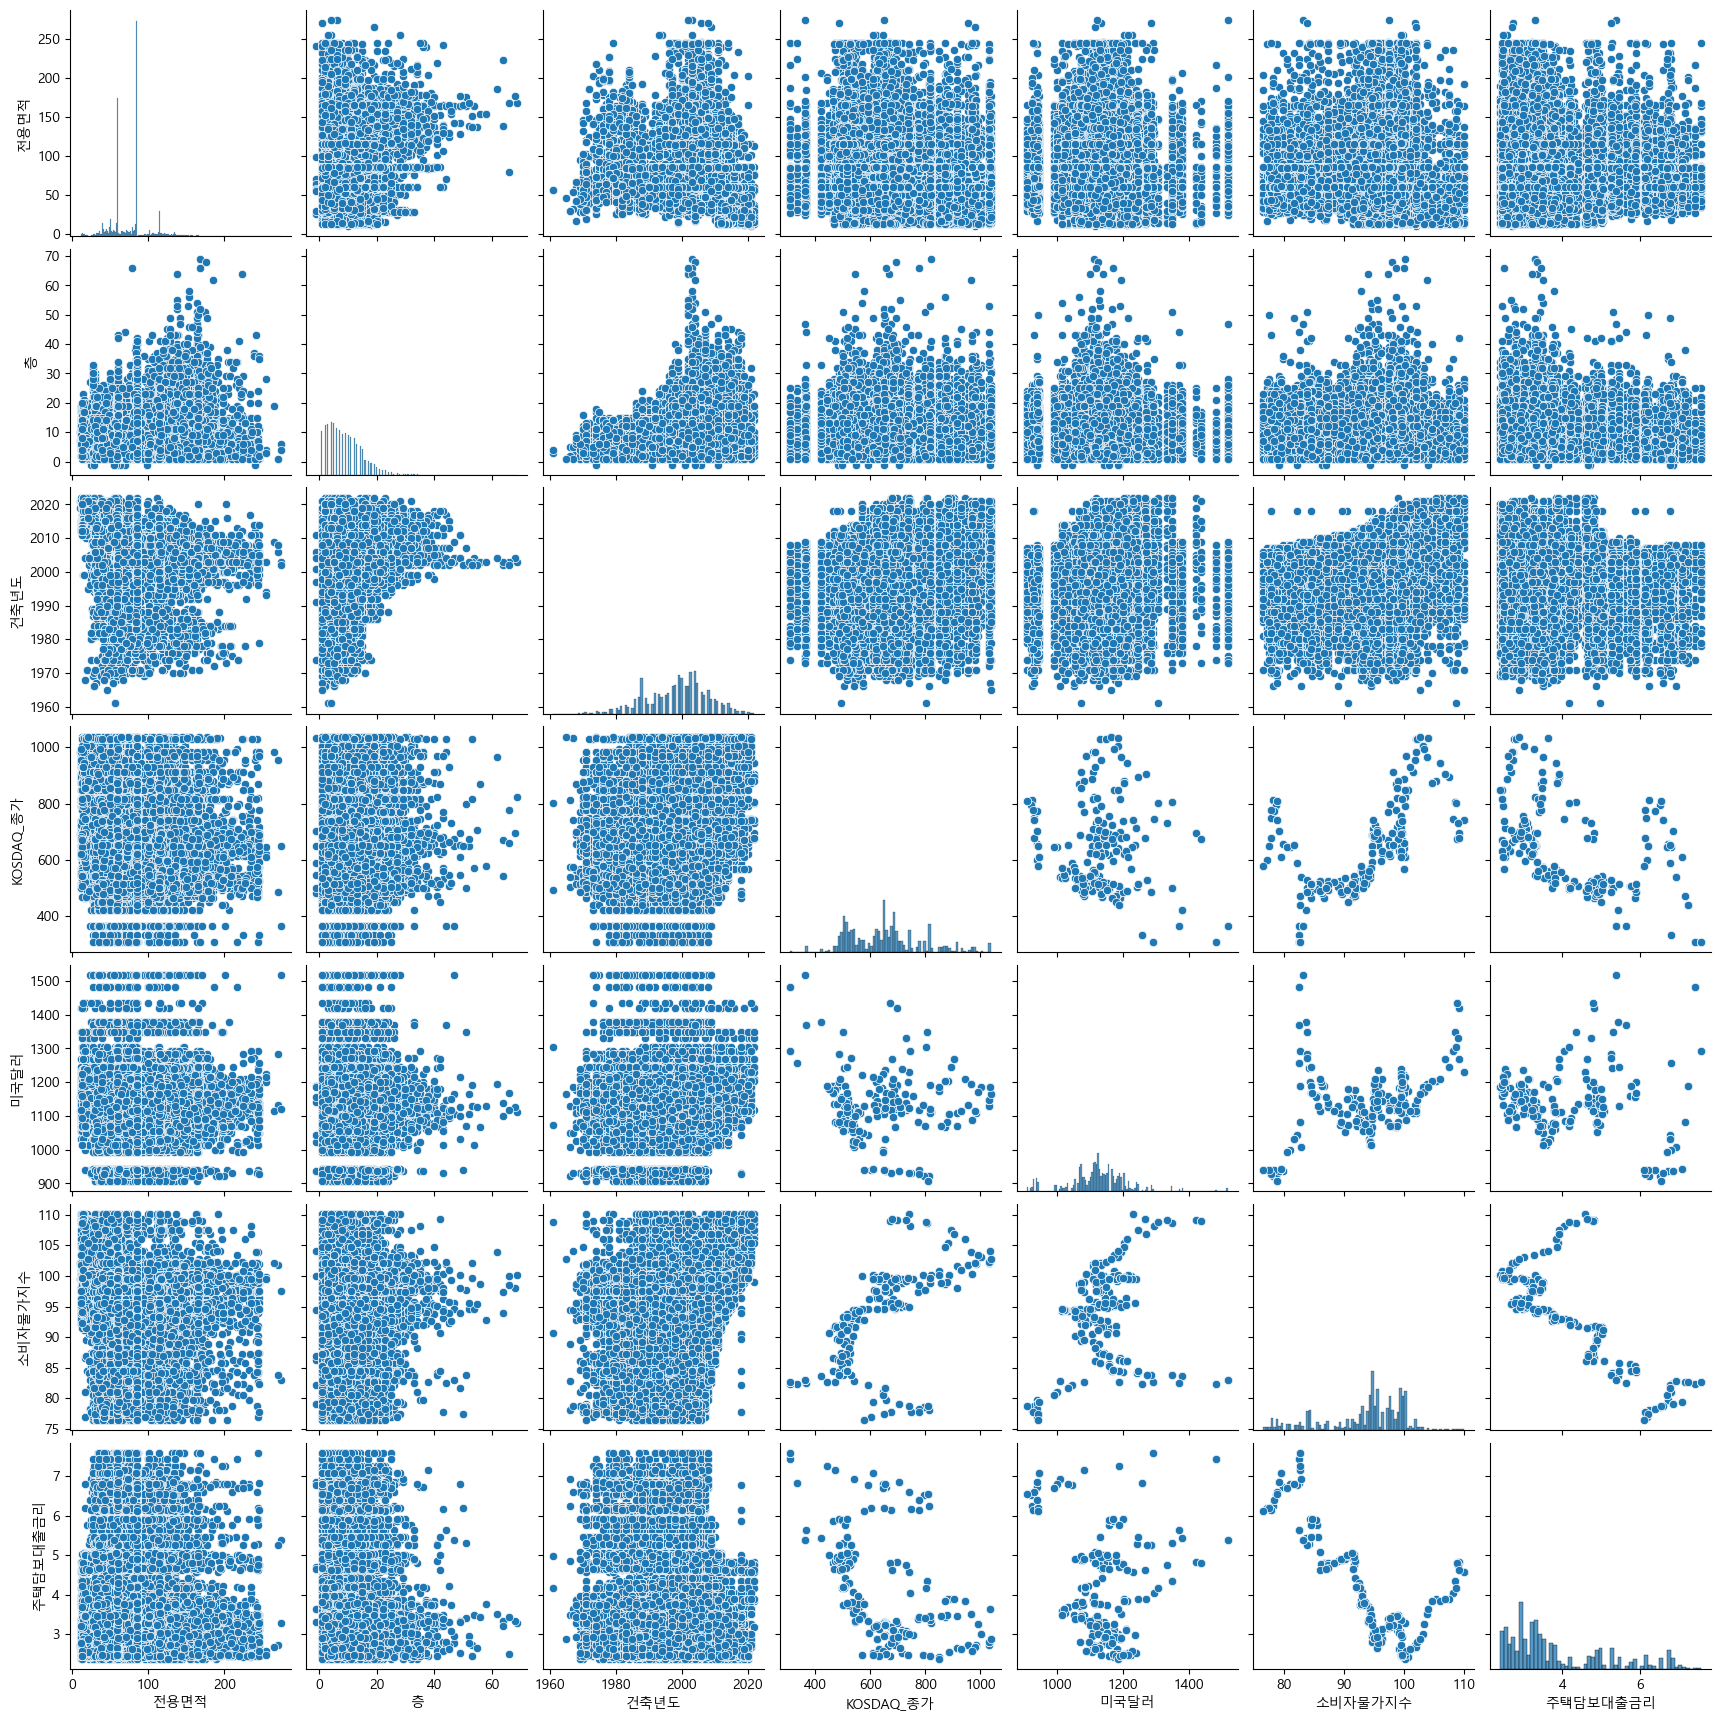

In [18]:
sns.pairplot(df2[['전용면적', '층', '건축년도', 'KOSDAQ_종가','미국달러', 
                  '소비자물가지수','주택담보대출금리']].sample(frac=0.05))
plt.show()

In [19]:
# VIF 큰 값 제외한 다중회귀분석 (7개 독립변수)
# 16개변수 적용시와 비교 결과 : 적합성 다소 떨어짐 0.805->0.80 / 조건수 높아짐   0.0000133 -> 0.00431
X=df_X[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','주택담보대출금리']]
y=df_X['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7997962783300865
P-value:
 전용면적         7.000179e-261
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
주택담보대출금리      0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          6.379e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:05:44   Log-Likelihood:                     -8.2336e+06
No. Observations:             1117750   AIC:                                  1.647e+07
Df Residuals:                 1117743   BIC:                                  1.647e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4273      0.012     34.513      0.000       0.403       0.452
층              6.9182      0.061    113.281      0.000       6.799       7.038
건축년도          -1.8948      0.007   -264.862      0.000      -1.909      -1.881
미국달러           0.9798      0.005    200.464      0.000       0.970       0.989
소비자물가지수       25.9446      0.135    192.294      0.000      25.680      26.209
KOSDAQ_종가      0.9258      0.003    271.295      0.000       0.919       0.932
주택담보대출금리      77.5082      0.643    120.510      0.000      76.248      78.769
==============================================================================
Omnibus:                   568463.310   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5361959.034
Skew:                           2.263   Prob(JB):                         0.00
Kurtosis:                      12.728   Cond. No.                     4.31e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.31e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# formular 형태 분석 시 R 값 0.236 
import statsmodels.formula.api as smf

model = smf.ols(
    formula= 
    '면적당가격 ~ 전용면적 + 층 + 건축년도 + 미국달러 + 소비자물가지수 + KOSDAQ_종가 + 주택담보대출금리'
    ,data=df_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  면적당가격   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                 4.940e+04
Date:                Mon, 27 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:05:49   Log-Likelihood:            -8.2335e+06
No. Observations:             1117750   AIC:                         1.647e+07
Df Residuals:                 1117742   BIC:                         1.647e+07
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    778.4647     80.155      9.712      0.000     621.364     935.566
전용면적           0.4320      0.012     34.871      0.000       0.408       0.456
층              7.0218      0.062    113.267      0.000       6.900       7.143
건축년도          -2.2781      0.040    -56.797      0.000      -2.357      -2.199
미국달러           0.9777      0.005    199.831      0.000       0.968       0.987
소비자물가지수       25.8481      0.135    191.070      0.000      25.583      26.113
KOSDAQ_종가      0.9271      0.003    271.478      0.000       0.920       0.934
주택담보대출금리      76.7131      0.648    118.324      0.000      75.442      77.984
==============================================================================
Omnibus:                   567517.399   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5347634.395
Skew:                           2.259   Prob(JB):                         0.00
Kurtosis:                      12.717   Cond. No.                     5.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 변수별 적합성 검토

In [21]:
# 비슷한 유형별 변수 교체 (미국달러->일본엔)다중회귀분석 
# 결과 : 적합성 낮아짐 0.80->0.798 / 조건수 낮아짐   0.00431 -> 0.00394
X=df1[['전용면적','층','건축년도', '일본엔', '소비자물가지수',  'KOSDAQ_종가','주택담보대출금리']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()  

모형의적합성_R2 : 0.7983767193317679
P-value:
 전용면적         3.648165e-234
층             0.000000e+00
건축년도          0.000000e+00
일본엔           0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
주택담보대출금리      0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          6.323e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:05:54   Log-Likelihood:                     -8.2375e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117743   BIC:                                  1.648e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4061      0.012     32.682      0.000       0.382       0.430
층              6.8574      0.061    111.891      0.000       6.737       6.978
건축년도          -1.5957      0.007   -227.057      0.000      -1.609      -1.582
일본엔           49.3448      0.276    178.978      0.000      48.804      49.885
소비자물가지수       25.8434      0.137    188.924      0.000      25.575      26.112
KOSDAQ_종가      1.0498      0.004    271.843      0.000       1.042       1.057
주택담보대출금리      51.6100      0.665     77.572      0.000      50.306      52.914
==============================================================================
Omnibus:                   569753.214   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5366263.904
Skew:                           2.271   Prob(JB):                         0.00
Kurtosis:                      12.726   Cond. No.                     3.94e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
# 비슷한 유형별 변수 교체 (일본엔->유로)다중회귀분석 -> 미국달러가 가장 적합성 높음
# 결과 : 적합성 높아짐 0.798->0.8 / 조건수 높아짐   0.00394 -> 0.00508
X=df1[['전용면적','층','건축년도', '유로', '소비자물가지수',  'KOSDAQ_종가','주택담보대출금리']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()  

모형의적합성_R2 : 0.8003874624878994
P-value:
 전용면적         1.907315e-232
층             0.000000e+00
건축년도          0.000000e+00
유로            0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
주택담보대출금리      5.403403e-73
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          6.403e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:01   Log-Likelihood:                     -8.2319e+06
No. Observations:             1117750   AIC:                                  1.646e+07
Df Residuals:                 1117743   BIC:                                  1.646e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4025      0.012     32.561      0.000       0.378       0.427
층              6.8770      0.061    112.774      0.000       6.757       6.997
건축년도          -1.7914      0.007   -254.052      0.000      -1.805      -1.778
유로             0.7273      0.003    208.843      0.000       0.720       0.734
소비자물가지수       26.9708      0.133    202.573      0.000      26.710      27.232
KOSDAQ_종가      0.9888      0.004    281.121      0.000       0.982       0.996
주택담보대출금리      12.9955      0.719     18.072      0.000      11.586      14.405
==============================================================================
Omnibus:                   570840.098   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5390470.478
Skew:                           2.275   Prob(JB):                         0.00
Kurtosis:                      12.749   Cond. No.                     5.08e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.08e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
# 비슷한 유형별 변수 교체 (KOSDAQ->KOSPI)다중회귀분석 -> KOSDAQ 적합성 높음
# 결과 : 적합성 떨어짐 0.80->0.796  / 조건수 높아짐   0.00431 -> 0.00588
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSPI_종가','주택담보대출금리']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary() 

모형의적합성_R2 : 0.7961547718833589
P-value:
 전용면적        4.228592e-176
층            0.000000e+00
건축년도         0.000000e+00
미국달러         0.000000e+00
소비자물가지수      0.000000e+00
KOSPI_종가     0.000000e+00
주택담보대출금리     0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.796
Model:                            OLS   Adj. R-squared (uncentered):              0.796
Method:                 Least Squares   F-statistic:                          6.236e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:05   Log-Likelihood:                     -8.2437e+06
No. Observations:             1117750   AIC:                                  1.649e+07
Df Residuals:                 1117743   BIC:                                  1.649e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.3534      0.012     28.298      0.000       0.329       0.378
층              6.7693      0.062    109.838      0.000       6.649       6.890
건축년도          -1.4252      0.008   -187.382      0.000      -1.440      -1.410
미국달러           1.1487      0.005    209.560      0.000       1.138       1.159
소비자물가지수       11.9978      0.176     68.234      0.000      11.653      12.342
KOSPI_종가       0.4405      0.002    228.733      0.000       0.437       0.444
주택담보대출금리      46.2263      0.679     68.056      0.000      44.895      47.558
==============================================================================
Omnibus:                   576467.768   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5381451.632
Skew:                           2.309   Prob(JB):                         0.00
Kurtosis:                      12.707   Cond. No.                     5.88e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
# 비슷한 유형별 변수 교체 (주택담보대출->콜금리) 다중회귀분석  
# 결과 : 적합성 낮아짐 0.8->0.798  / 조건수 높아짐   0.00431 -> 0.00436
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','콜금리_1일']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7976853487292562
P-value:
 전용면적         1.371723e-230
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
콜금리_1일        0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          6.296e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:11   Log-Likelihood:                     -8.2395e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117743   BIC:                                  1.648e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4038      0.012     32.429      0.000       0.379       0.428
층              6.8075      0.061    110.889      0.000       6.687       6.928
건축년도          -1.4443      0.007   -205.750      0.000      -1.458      -1.431
미국달러           1.1766      0.006    194.962      0.000       1.165       1.188
소비자물가지수       15.8149      0.101    157.014      0.000      15.617      16.012
KOSDAQ_종가      1.0122      0.004    286.575      0.000       1.005       1.019
콜금리_1일        34.3998      0.661     52.046      0.000      33.104      35.695
==============================================================================
Omnibus:                   569444.440   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5349806.472
Skew:                           2.270   Prob(JB):                         0.00
Kurtosis:                      12.709   Cond. No.                     4.36e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# 비슷한 유형별 변수 교체 (콜금리->KORIBOR_3개월) 다중회귀분석  
# 결과 : 적합성 같음 0.798->0.798  / 조건수 낮아짐   0.00436 -> 0.00413
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','KORIBOR_3개월']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7984900695719799
P-value:
 전용면적           1.026740e-255
층               0.000000e+00
건축년도            0.000000e+00
미국달러            0.000000e+00
소비자물가지수         0.000000e+00
KOSDAQ_종가       0.000000e+00
KORIBOR_3개월     0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          6.327e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:14   Log-Likelihood:                     -8.2372e+06
No. Observations:             1117750   AIC:                                  1.647e+07
Df Residuals:                 1117743   BIC:                                  1.647e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
전용면적            0.4246      0.012     34.167      0.000       0.400       0.449
층               6.8591      0.061    111.950      0.000       6.739       6.979
건축년도           -1.6516      0.007   -234.988      0.000      -1.665      -1.638
미국달러            1.2198      0.006    218.644      0.000       1.209       1.231
소비자물가지수        19.0901      0.109    175.440      0.000      18.877      19.303
KOSDAQ_종가       1.0242      0.003    294.460      0.000       1.017       1.031
KORIBOR_3개월    52.8462      0.624     84.754      0.000      51.624      54.068
==============================================================================
Omnibus:                   568091.947   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5324595.928
Skew:                           2.264   Prob(JB):                         0.00
Kurtosis:                      12.687   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
# 비슷한 유형별 변수 교체 (KORIBOR_3개월->CD_91일) 다중회귀분석  
# 결과 : 적합성 같음 0.798->0.798  / 조건수 높아짐   0.00413 -> 0.00416
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','CD_91일']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.798339809962189
P-value:
 전용면적         1.003475e-252
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
CD_91일        0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          6.321e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:18   Log-Likelihood:                     -8.2376e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117743   BIC:                                  1.648e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4223      0.012     33.965      0.000       0.398       0.447
층              6.8523      0.061    111.798      0.000       6.732       6.972
건축년도          -1.6208      0.007   -230.059      0.000      -1.635      -1.607
미국달러           1.2073      0.006    216.090      0.000       1.196       1.218
소비자물가지수       18.6426      0.109    171.714      0.000      18.430      18.855
KOSDAQ_종가      1.0238      0.003    293.558      0.000       1.017       1.031
CD_91일        50.0541      0.628     79.656      0.000      48.822      51.286
==============================================================================
Omnibus:                   568295.048   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5328008.459
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      12.689   Cond. No.                     4.16e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
# 비슷한 유형별 변수 교체 (CD_91일->국고채_1년) 다중회귀분석  -> 주택담보대출금리 적합성 가장 높음
# 결과 : 적합성 같음 0.798->0.798  / 조건수 높아짐   0.00413 -> 0.00452
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','국고채_1년']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7983465508330772
P-value:
 전용면적         2.760726e-251
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
국고채_1년        0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.798
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                          6.322e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:22   Log-Likelihood:                     -8.2376e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117743   BIC:                                  1.648e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4210      0.012     33.867      0.000       0.397       0.445
층              6.8623      0.061    111.956      0.000       6.742       6.982
건축년도          -1.6626      0.008   -221.629      0.000      -1.677      -1.648
미국달러           1.1998      0.006    216.616      0.000       1.189       1.211
소비자물가지수       19.6462      0.118    166.282      0.000      19.415      19.878
KOSDAQ_종가      1.0058      0.003    291.809      0.000       0.999       1.013
국고채_1년        54.4304      0.681     79.891      0.000      53.095      55.766
==============================================================================
Omnibus:                   568537.039   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5343357.504
Skew:                           2.265   Prob(JB):                         0.00
Kurtosis:                      12.706   Cond. No.                     4.52e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# 비슷한 유형별 변수 교체 (국고채_1년->국고채_10년) 다중회귀분석  -> 주택담보대출금리 적합성 가장 높음
# 결과 : 적합성 높아짐 0.798->0.799  / 조건수 낮아짐   0.00452 -> 0.00389
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가','국고채_10년']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7990453756687462
P-value:
 전용면적         1.224402e-240
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
국고채_10년       0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.799
Method:                 Least Squares   F-statistic:                          6.349e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:25   Log-Likelihood:                     -8.2357e+06
No. Observations:             1117750   AIC:                                  1.647e+07
Df Residuals:                 1117743   BIC:                                  1.647e+07
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.4109      0.012     33.135      0.000       0.387       0.435
층              6.8700      0.061    112.290      0.000       6.750       6.990
건축년도          -1.6883      0.006   -262.786      0.000      -1.701      -1.676
미국달러           0.9587      0.005    195.327      0.000       0.949       0.968
소비자물가지수       22.7515      0.127    179.605      0.000      22.503      23.000
KOSDAQ_종가      0.9739      0.003    286.099      0.000       0.967       0.981
국고채_10년       58.9317      0.581    101.449      0.000      57.793      60.070
==============================================================================
Omnibus:                   568780.655   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5346198.399
Skew:                           2.266   Prob(JB):                         0.00
Kurtosis:                      12.708   Cond. No.                     3.89e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 변수별 예측

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
x=df1[['전용면적', '층', '미국달러','소비자물가지수', 
       'KOSDAQ_종가','주택담보대출금리']]      
y=df1[['면적당가격']] 
model.fit(x,y)

LinearRegression()

In [30]:
#전용면적 상승, 나머지 변수 평균값 적용: 면적당 가격 885 => 가장 낮음
전용면적 = 500
층 = 9
미국달러 = 1123
소비자물가지수 = 93  
KOSDAQ_종가 = 651  
주택담보대출금리 = 3.8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price1 = model.predict([Predict])
price1

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[885.63046208]])

In [31]:
#층 상승 , 나머지 변수 평균값 적용: 면적당 가격 1173 
전용면적 = 77
층 = 80
미국달러 = 1123
소비자물가지수 = 93  
KOSDAQ_종가 = 651  
주택담보대출금리 = 3.8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price2 = model.predict([Predict])
price2

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1173.06493263]])

In [32]:
#미국달러 상승 , 나머지 변수 평균값 적용: 면적당 가격 1186
전용면적 = 77
층 = 9
미국달러 = 1600
소비자물가지수 = 93  
KOSDAQ_종가 = 651  
주택담보대출금리 = 3.8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price3 = model.predict([Predict])
price3

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1186.21998045]])

In [33]:
#소비자물가지수 상승 , 나머지 변수 평균값 적용: 면적당 가격 1399  => 가장 높음
전용면적 = 77
층 = 9
미국달러 = 1123
소비자물가지수 = 120  
KOSDAQ_종가 = 651  
주택담보대출금리 = 3.8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price4 = model.predict([Predict])
price4

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1399.75371364]])

In [34]:
#KOSDAQ_종가 상승 , 나머지 변수 평균값 적용: 면적당 가격 1132
전용면적 = 77
층 = 9
미국달러 = 1123
소비자물가지수 = 93  
KOSDAQ_종가 = 1100  
주택담보대출금리 = 3.8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price5 = model.predict([Predict])
price5

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1132.34667695]])

In [35]:
#극고채_10년 상승 , 나머지 변수 평균값 적용: 면적당 가격 1035 
전용면적 = 77
층 = 9
미국달러 = 1123
소비자물가지수 = 93  
KOSDAQ_종가 = 651  
주택담보대출금리 = 8


Predict = [전용면적, 층, 미국달러 ,소비자물가지수, KOSDAQ_종가, 주택담보대출금리]
price6 = model.predict([Predict])
price6

c:\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[1035.51516434]])

## 모델적합성 개선 
### - 후진제거법/P-value 큰 것 2개 전용면적, 주택담보대출금리 제거
#### -- 결과 : 개별 변수들의 P-value 모두 유효함 ->  R2 값 0.80 에서 개선 없음  
 

In [36]:
# 전용면적 변수 제거(7개 변수 적용시 P-value = 7.000179e-261) -> R2=0.80
X=df1[['주택담보대출금리','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7995829251279121
P-value:
 주택담보대출금리     0.0
층            0.0
건축년도         0.0
미국달러         0.0
소비자물가지수      0.0
KOSDAQ_종가    0.0
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.800
Model:                            OLS   Adj. R-squared (uncentered):              0.800
Method:                 Least Squares   F-statistic:                          7.432e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:53   Log-Likelihood:                     -8.2342e+06
No. Observations:             1117750   AIC:                                  1.647e+07
Df Residuals:                 1117744   BIC:                                  1.647e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
주택담보대출금리      76.6903      0.643    119.256      0.000      75.430      77.951
층              7.1294      0.061    117.268      0.000       7.010       7.249
건축년도          -1.8745      0.007   -262.775      0.000      -1.888      -1.861
미국달러           0.9813      0.005    200.658      0.000       0.972       0.991
소비자물가지수       25.8826      0.135    191.750      0.000      25.618      26.147
KOSDAQ_종가      0.9225      0.003    270.301      0.000       0.916       0.929
==============================================================================
Omnibus:                   567189.072   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5296607.760
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      12.658   Cond. No.                     4.30e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 4.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
# 주택담보대출금리 변수 제거(16개 변수 적용시 P-value = 2.796779e-43) -> R2=0.797
X=df1[['전용면적','층','건축년도', '미국달러', '소비자물가지수',  'KOSDAQ_종가']]
y=df1['면적당가격']

import statsmodels.api as sm

model = sm.OLS(y, X)
result = model.fit()
print("모형의적합성_R2 :",result.rsquared)
print("P-value:\n",result.pvalues)
result.summary()

모형의적합성_R2 : 0.7971950518670515
P-value:
 전용면적         2.359834e-196
층             0.000000e+00
건축년도          0.000000e+00
미국달러          0.000000e+00
소비자물가지수       0.000000e+00
KOSDAQ_종가     0.000000e+00
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  면적당가격   R-squared (uncentered):                   0.797
Model:                            OLS   Adj. R-squared (uncentered):              0.797
Method:                 Least Squares   F-statistic:                          7.323e+05
Date:                Mon, 27 Mar 2023   Prob (F-statistic):                        0.00
Time:                        12:06:59   Log-Likelihood:                     -8.2408e+06
No. Observations:             1117750   AIC:                                  1.648e+07
Df Residuals:                 1117744   BIC:                                  1.648e+07
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
전용면적           0.3723      0.012     29.900      0.000       0.348       0.397
층              6.7284      0.061    109.501      0.000       6.608       6.849
건축년도          -1.1162      0.003   -360.967      0.000      -1.122      -1.110
미국달러           0.9941      0.005    202.135      0.000       0.984       1.004
소비자물가지수       12.1098      0.071    169.745      0.000      11.970      12.250
KOSDAQ_종가      0.9652      0.003    282.324      0.000       0.959       0.972
==============================================================================
Omnibus:                   572289.278   Durbin-Watson:                   1.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5425037.807
Skew:                           2.281   Prob(JB):                         0.00
Kurtosis:                      12.781   Cond. No.                         468.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 교차검증
### - 결과 
#### -- 면적당 가격에 가장 큰 영향을 주는 특성은 주택담보대출금리이고
#### -- 예측오차는 191.45 원이다.   

In [38]:
#정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df2)
scaled_df = scaler.transform(df2)
scaled_df.shape

(1117750, 7)

In [39]:
#학습용과 검증용을 8:2로 구분
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_df, df_y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape)

(894200, 7) (223550, 7)


In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [41]:
# 평균제곱근오차 모형-> 오차 381
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

381.3211156045082


In [42]:
# 의사결정 나무 모형 -> 오차 253
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

253.5201300743126


In [43]:
# 랜덤 포레스트  -> 오차 190.77 로 가장 성능 좋은 모형
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_jobs = -1) 
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_12136\3720149784.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


190.77456018418988


In [46]:
# 파라미터튜닝
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30, 50, 100], 'max_features':[2, 4, 6, 8]},
 ]
 

In [47]:
from sklearn.model_selection import GridSearchCV
forest_reg = RandomForestRegressor(random_state=0,n_jobs=-1)
grid_search = GridSearchCV(forest_reg, param_grid, cv=2)
grid_search.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30, 50, 100]}])

In [48]:
#최적파라미터
grid_search.best_params_

{'max_features': 6, 'n_estimators': 100}

In [49]:
#최적 모형
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_jobs=-1, random_state=0)

In [50]:
df_X.head(1)

,면적당가격,전용면적,층,건축년도,KOSDAQ_종가,미국달러,소비자물가지수,주택담보대출금리
0,351.842588,59.97,8,2006,576.37,940.9,76.496,6.11


In [51]:
#랜덤포레스트 모형에서 가장 기여도 큰 변수 -> 소비자물가지수
feature_importances = grid_search.best_estimator_.feature_importances_
print(range(len(feature_importances)), feature_importances)

range(0, 7) [0.30505968 0.07285291 0.25523196 0.03018822 0.02207121 0.2688649
 0.04573112]


In [52]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {
 'n_estimators': randint(low=1, high=100), 
 'max_features': randint(low=1, high=8), 
 }
forest_reg = RandomForestRegressor(random_state=0, n_jobs=-1)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs, cv=5, random_state=0)
rnd_search.fit(X_train, y_train)

c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B2105EBC70>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001B210FB26D0>},
                   random_state=0)

In [53]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],
cvres["params"]):
 print(np.sqrt(mean_score), params)

0.8726081552692463 {'max_features': 5, 'n_estimators': 48}
0.8842171712553086 {'max_features': 6, 'n_estimators': 65}
0.8563240144844165 {'max_features': 4, 'n_estimators': 68}
0.800121773012386 {'max_features': 2, 'n_estimators': 84}
0.8826445506049438 {'max_features': 6, 'n_estimators': 37}
0.8905723339269248 {'max_features': 7, 'n_estimators': 89}
0.7582075738791291 {'max_features': 1, 'n_estimators': 13}
0.8310286637529118 {'max_features': 3, 'n_estimators': 66}
0.8886913801955997 {'max_features': 7, 'n_estimators': 40}
0.8905723339269248 {'max_features': 7, 'n_estimators': 89}


In [54]:
#최적 모델
rnd_search.best_estimator_

RandomForestRegressor(max_features=7, n_estimators=89, n_jobs=-1,
                      random_state=0)

In [55]:
#최종 오차 는 191.45 평당 가격 
final_model = rnd_search.best_estimator_
y_pred = final_model.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms) 

191.45370173200214


In [ ]:
'''서포트벡터머신  -> 시간 너무 걸림 (에러 발생)
from sklearn.svm import SVR
svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
y_pred = svm_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
 # 스케일링(StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df2 = scaler.fit_transform(df1) 
df3 = pd.DataFrame(df2,columns=df1.columns)
df3.boxplot()print(rms)'''

##  스케일링 후 VIF 값 산출 

<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


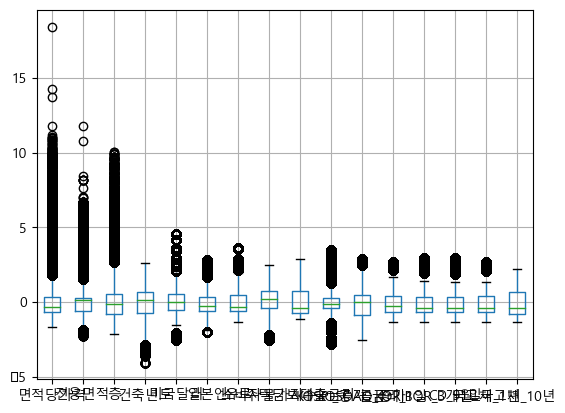

In [56]:
 # 스케일링(StandardScaler)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
df_S = scaler.fit_transform(df1) 
df_S1= pd.DataFrame(df_S,columns=df1.columns)
df_S1.boxplot()

In [57]:
## 스케일 후 16개 변수 VIF 산출
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_S1.values, i) for i in range(df_S1.shape[1])]
vif['독립변수'] = df_S1.columns
vif =vif.sort_values('VIF').reset_index(drop=True)
vif 

,VIF,독립변수
0,1.020104,전용면적
1,1.058136,층
2,1.069845,건축년도
3,1.342152,면적당가격
4,4.412340,일본엔
5,5.929416,KOSDAQ_종가
6,6.410410,미국달러
7,7.852443,유로
8,10.441765,KOSPI_종가
9,15.616735,소비자물가지수


<AxesSubplot:>

c:\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


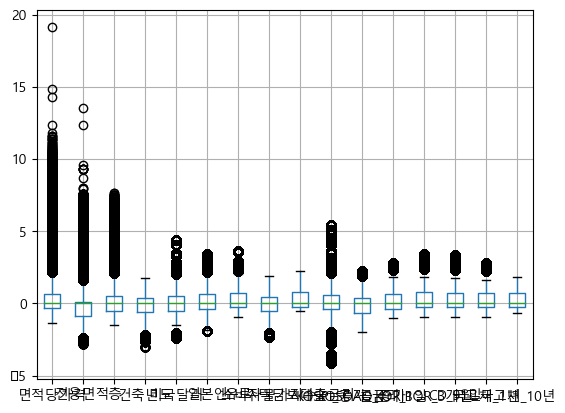

In [58]:
# 스케일링 (RobustScaler)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler() 
df_R = scaler.fit_transform(df1) 
df_R1 = pd.DataFrame(df_R,columns=df1.columns)
df_R1.boxplot()

In [59]:
## 16개 변수 VIF 산출
from statsmodels.stats.outliers_influence import variance_inflation_factor  

vif = pd.DataFrame()
vif['VIF']=[variance_inflation_factor(df_R1.values, i) for i in range(df_R1.shape[1])]
vif['독립변수'] = df_R1.columns
vif =vif.sort_values('VIF').reset_index(drop=True)
vif 

,VIF,독립변수
0,1.042798,전용면적
1,1.071908,층
2,1.083058,건축년도
3,1.465463,면적당가격
4,4.663549,일본엔
5,5.926690,KOSDAQ_종가
6,6.384199,미국달러
7,8.721467,유로
8,10.179207,KOSPI_종가
9,15.677811,소비자물가지수
